In [132]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [133]:
import os

train_path = os.path.join('data', 'train.csv')
test_path = os.path.join('data', 'test.csv')
test_labels_path = os.path.join('data', 'gender_submission.csv')

# load training and test data
train = pd.read_csv(train_path, sep=',')
test = pd.read_csv(test_path, sep=',')
labels = pd.read_csv(test_labels_path, sep=',')

In [134]:
# use passengerId column as index
train.set_index('PassengerId', inplace=True)
test.set_index('PassengerId', inplace=True)

In [135]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [181]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [136]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [137]:
# missing age feature values
train[train['Age'].isnull()][:10]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C


In [138]:
train[train['Sex'] == 'male'].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,577.000000,577.000000,453.000000,577.000000,577.000000,577.000000
mean,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893
std,0.391775,0.813580,14.678201,1.061811,0.612294,43.138263
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.000000,0.000000,0.000000,10.500000
75%,0.000000,3.000000,39.000000,0.000000,0.000000,26.550000
max,1.000000,3.000000,80.000000,8.000000,5.000000,512.329200


In [140]:
train[train['Sex'] == 'female'].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,314.000000,314.000000,261.000000,314.000000,314.000000,314.000000
mean,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
std,0.438211,0.857290,14.110146,1.156520,1.022846,57.997698
min,0.000000,1.000000,0.750000,0.000000,0.000000,6.750000
25%,0.000000,1.000000,18.000000,0.000000,0.000000,12.071875
50%,1.000000,2.000000,27.000000,0.000000,0.000000,23.000000
75%,1.000000,3.000000,37.000000,1.000000,1.000000,55.000000
max,1.000000,3.000000,63.000000,8.000000,6.000000,512.329200


In [142]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer()
train['Sex'] = label_binarizer.fit_transform(train['Sex'])
test['Sex']  = label_binarizer.fit_transform(test['Sex'])

print(train['Sex'][:5])

PassengerId
1    1
2    0
3    0
4    0
5    1
Name: Sex, dtype: int64


In [145]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy='median')
train_age = imputer.fit_transform(train['Age'].reshape(-1, 1))

train['Age'] = train_age.reshape(train['Age'].shape)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


In [146]:
imputer = Imputer(strategy='median')
test_age = imputer.fit_transform(test['Age'].reshape(-1, 1))

test['Age'] = test_age.reshape(test['Age'].shape)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [147]:
train['Age'] = train['Age'].astype(int)
test['Age'] = test['Age'].astype(int)

In [148]:
train['Cabin'].isnull().sum()

687

In [149]:
# drop Cabin feature
train.drop(['Cabin'], axis=1, inplace=True)
test.drop(['Cabin'], axis=1, inplace=True)

# drop Name feature
train.drop(['Name'], axis=1, inplace=True)
test.drop(['Name'], axis=1, inplace=True)

In [150]:
train['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [151]:
train['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

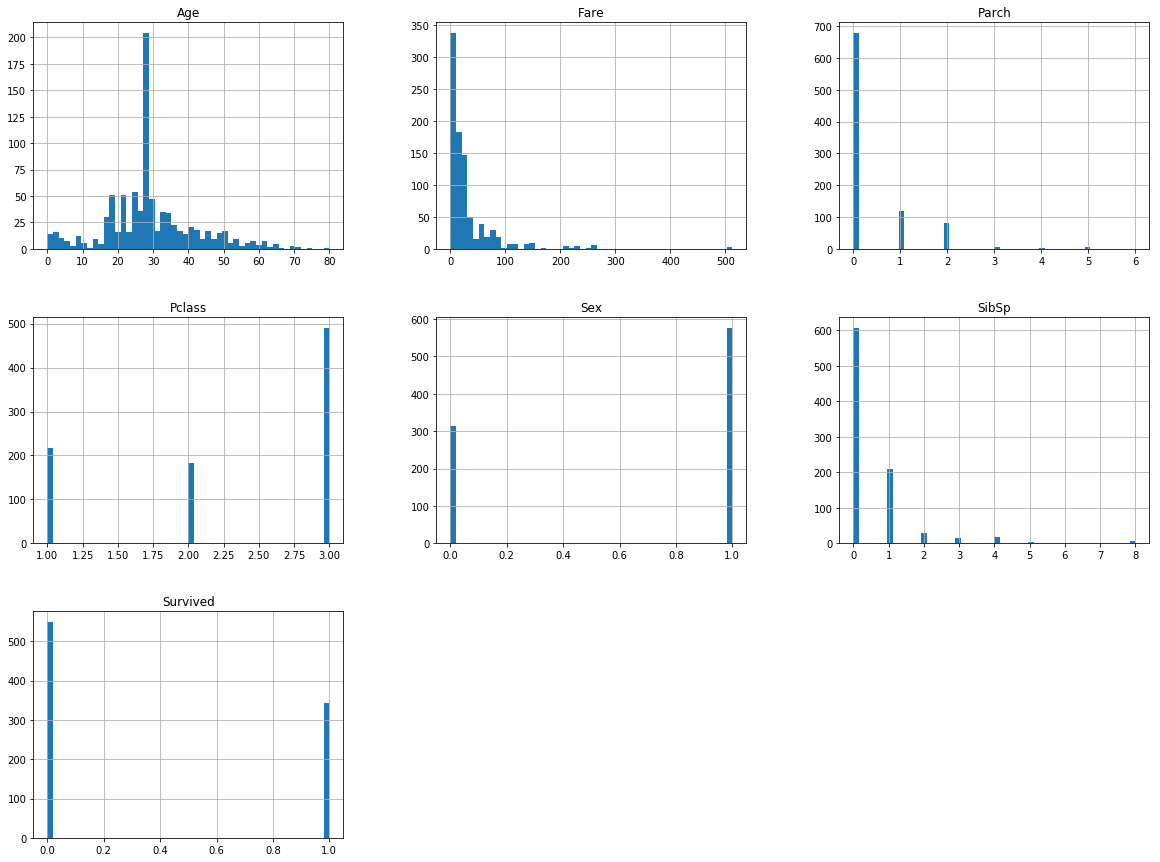

In [152]:
train.hist(bins=50, figsize=(20,15)) 
plt.show()

In [153]:
corr_matrix = train.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.064909
Pclass     -0.338481
Sex        -0.543351
Name: Survived, dtype: float64

In [154]:
# drop features
train.drop(['Embarked'], axis=1, inplace=True)
train.drop(['Ticket'], axis=1, inplace=True)

test.drop(['Embarked'], axis=1, inplace=True)
test.drop(['Ticket'], axis=1, inplace=True)

In [155]:
train.shape, test.shape

((891, 7), (418, 6))

In [165]:
y_train = train['Survived']
X_train = train.drop(['Survived'], axis=1)

In [166]:
X_train.shape, y_train.shape

((891, 6), (891,))

In [174]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_neighbors': [3, 5, 7, 10], 'weights': ['uniform', 'distance']}
]

knn_clf = KNeighborsClassifier()

grid_search = GridSearchCV(knn_clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

grid_search.best_params_

{'n_neighbors': 3, 'weights': 'uniform'}

In [169]:
print("Best cross validation score: {:.2f}".format(grid_search.best_score_))

Best cross validation score: 0.71


In [170]:
y_train_pred = grid_search.predict(X_train)

In [172]:
from sklearn.metrics import classification_report
print(classification_report(y_train_pred, y_train))

             precision    recall  f1-score   support

          0       0.89      0.86      0.87       570
          1       0.76      0.81      0.79       321

avg / total       0.84      0.84      0.84       891



In [177]:
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    {'bootstrap': [False], 'n_estimators': [10, 100, 100], 'max_features': [1, 3, 5]},
    {'n_estimators': [10, 100, 100], 'max_features': [1, 3, 5]}
]

for_clf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(for_clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

grid_search.best_params_

{'max_features': 5, 'n_estimators': 100}

In [178]:
print("Best cross validation score: {:.2f}".format(grid_search.best_score_))

Best cross validation score: 0.82


In [179]:
y_train_pred = grid_search.predict(X_train)

In [180]:
from sklearn.metrics import classification_report
print(classification_report(y_train_pred, y_train))

             precision    recall  f1-score   support

          0       0.99      0.97      0.98       561
          1       0.96      0.99      0.97       330

avg / total       0.98      0.98      0.98       891

